<a href="https://colab.research.google.com/github/SaiKarun-28/FUTURE_DS_03/blob/main/College_Event_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving College Feedback Sentiment-01.xlsx to College Feedback Sentiment-01 (1).xlsx


In [3]:
import os
os.listdir('/content')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('/content/College Feedback Sentiment-01 (1).xlsx')
df.head()

,Student_ID,Student_Name,Department,Year,Event_Name,Feedback,Rating,Suggestions,Overall_Experience
0,S001,Aarav Mehta,CSE,1st,Tech Fest,The event was very well organized and exciting!,5,NaN,Excellent
1,S002,Priya Sharma,ECE,2nd,Cultural Night,"Loved the performances, it was a memorable night.",4,Include more food stalls,Very Good
2,S003,Rohan Verma,Mechanical,3rd,Sports Day,Sports events were fun but could have been mor...,3,Better time management,Good
3,S004,Sneha Patel,CSE,1st,Tech Fest,"Amazing tech talks and workshops, learned a lot.",5,More coding events,Excellent
4,S005,Vikas Singh,IT,2nd,Hackathon,Hackathon was intense but a great experience o...,4,Provide rest areas,Very Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          20 non-null     object
 1   Student_Name        20 non-null     object
 2   Department          20 non-null     object
 3   Year                20 non-null     object
 4   Event_Name          20 non-null     object
 5   Feedback            20 non-null     object
 6   Rating              20 non-null     int64 
 7   Suggestions         19 non-null     object
 8   Overall_Experience  20 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.5+ KB


In [8]:
df.isnull().sum()

,0
Student_ID,0
Student_Name,0
Department,0
Year,0
Event_Name,0
Feedback,0
Rating,0
Suggestions,1
Overall_Experience,0


In [10]:
df['Suggestions'] = df['Suggestions'].fillna("no opinion")

In [11]:
df.isnull().sum()

,0
Student_ID,0
Student_Name,0
Department,0
Year,0
Event_Name,0
Feedback,0
Rating,0
Suggestions,0
Overall_Experience,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe(include = 'all')

,Student_ID,Student_Name,Department,Year,Event_Name,Feedback,Rating,Suggestions,Overall_Experience
count,20,20,20,20,20,20,20.00000,20,20
unique,20,20,5,3,4,20,NaN,20,3
top,S001,Aarav Mehta,CSE,1st,Tech Fest,The event was very well organized and exciting!,NaN,no opinion,Very Good
freq,1,1,5,7,6,1,NaN,1,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.15000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.67082,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.00000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.00000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN


In [20]:
event_ratings = df.groupby('Event_Name')['Rating'].mean()
event_ratings

,Rating
Event_Name,
Cultural Night,4.0
Hackathon,4.0
Sports Day,3.4
Tech Fest,5.0


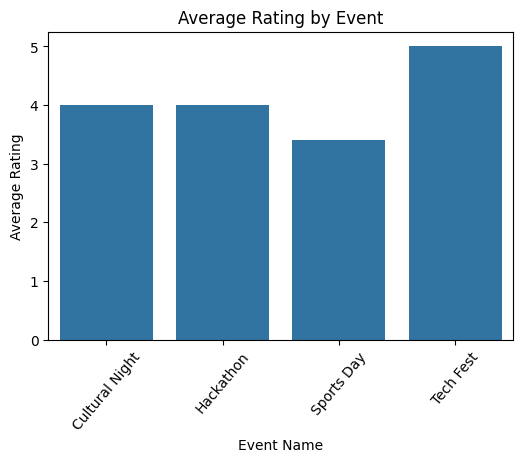

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x=event_ratings.index, y=event_ratings.values)
plt.xlabel('Event Name')
plt.ylabel('Average Rating')
plt.title('Average Rating by Event')
plt.xticks(rotation=50)
plt.show()

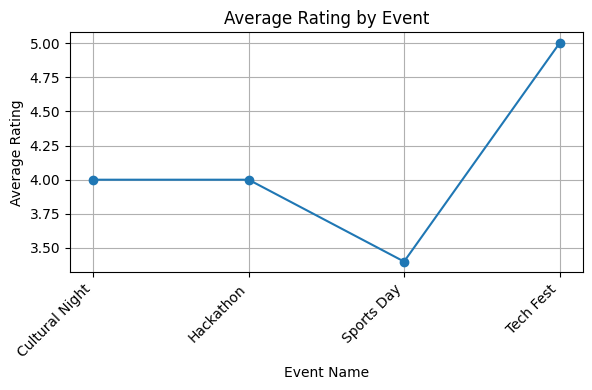

In [55]:
plt.figure(figsize=(6,4))
plt.plot(event_ratings.index, event_ratings.values, marker='o', linestyle='-')
plt.xlabel('Event Name')
plt.ylabel('Average Rating')
plt.title('Average Rating by Event')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
pip install textblob

In [35]:
from textblob import TextBlob


In [44]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity
df['Sentiment_Score'] = df['Feedback'].apply(get_sentiment)
df[['Feedback','Sentiment_Score']].head()

,Feedback,Sentiment_Score
0,The event was very well organized and exciting!,0.287500
1,"Loved the performances, it was a memorable night.",0.600000
2,Sports events were fun but could have been mor...,0.400000
3,"Amazing tech talks and workshops, learned a lot.",0.600000
4,Hackathon was intense but a great experience o...,0.333333


In [50]:
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Sentiment_type'] = df['Sentiment_Score'].apply(classify_sentiment)

In [51]:
df['Sentiment_type'].value_counts()

,count
Sentiment_type,
Positive,16
Neutral,3
Negative,1


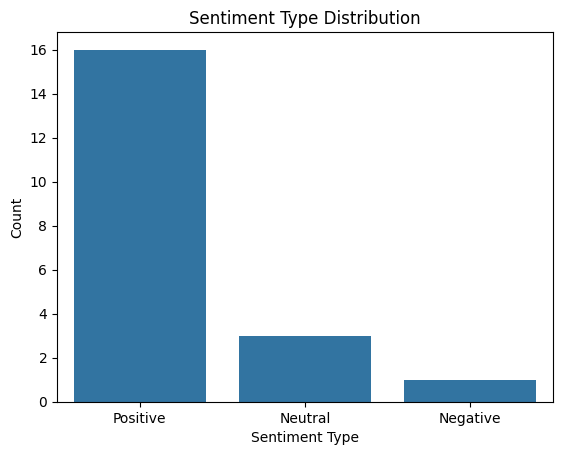

In [58]:
sns.countplot(x='Sentimen_type', data=df)
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.title('Sentiment Type Distribution')
plt.show()

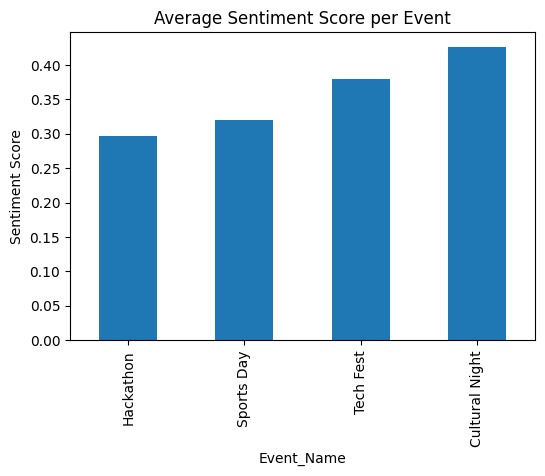

In [53]:
event_sentiment = df.groupby('Event_Name')['Sentiment_Score'].mean().sort_values()
event_sentiment
event_sentiment.plot(kind='bar', figsize=(6,4))
plt.title("Average Sentiment Score per Event")
plt.ylabel("Sentiment Score")
plt.show()

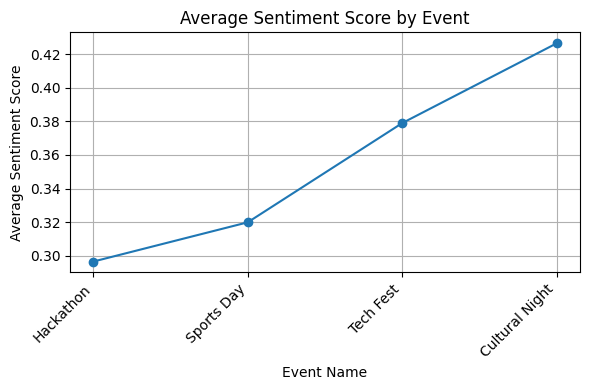

In [56]:
plt.figure(figsize=(6,4))
plt.plot(event_sentiment.index, event_sentiment.values, marker='o', linestyle='-')
plt.xlabel('Event Name')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Event')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
print('Average Ratings : ')
print(event_ratings)
print('\n')
print('Average Sentiment Score : ')
print(event_sentiment)
print('\n')
print("\nSentiment Distribution:")
print(df['Sentiment_type'].value_counts())
print('\n')
print("\nEvent with Best Sentiment:", event_sentiment.idxmax())
print("Event with Worst Sentiment:", event_sentiment.idxmin())

Average Ratings : 
Event_Name
Cultural Night    4.0
Hackathon         4.0
Sports Day        3.4
Tech Fest         5.0
Name: Rating, dtype: float64


Average Sentiment Score : 
Event_Name
Hackathon         0.296667
Sports Day        0.320000
Tech Fest         0.378977
Cultural Night    0.426389
Name: Sentiment_Score, dtype: float64



Sentiment Distribution:
Sentiment_type
Positive    16
Neutral      3
Negative     1
Name: count, dtype: int64



Event with Best Sentiment: Cultural Night
Event with Worst Sentiment: Hackathon
